# Import library


In [149]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import dataframe_image as dfi

# Preporcess and clean data

In [150]:
#combine data
data1 = pd.read_excel("_202105.xlsx")
data2 = pd.read_excel("_202106.xlsx")
data3 = pd.read_excel("_202107.xlsx")
data4 = pd.read_excel("_202108.xlsx")
data5 = pd.read_excel("_202109.xlsx")
data6 = pd.read_excel("_202110.xlsx")

ref = pd.read_excel('reference.xlsx')

df = pd.concat([data1,data2,data3,data4,data5,data6])

print(df.info())
dfi.export(df.head(3), 'dataframe.png')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AsOfDate                  693 non-null    object
 1   ItemNo                    693 non-null    int64 
 2   LoactionCode              693 non-null    object
 3   LocationName              693 non-null    object
 4   GeneralPassport           693 non-null    int64 
 5   HajjPassport              693 non-null    int64 
 6   DiplomaticPassport        693 non-null    int64 
 7   OfficialPassport          693 non-null    int64 
 8   EmergencyPassport         693 non-null    int64 
 9   EmergencyTravelDocuments  693 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 59.6+ KB
None


In [151]:
print(ref.info())
dfi.export(ref.head(3), 'dataframe2.png')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          63 non-null     object
 1   LocationName3       63 non-null     object
 2   GeneralPassport     63 non-null     int64 
 3   HajjPassport        63 non-null     int64 
 4   DiplomaticPassport  63 non-null     int64 
 5   OfficialPassport    63 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.1+ KB
None


In [152]:
# convert datetime

def convert_date(date):
    return datetime.strptime(date, '%Y-%m').strftime('%b-%Y')

In [153]:
df[["Day", "Month", "Year"]] = df["AsOfDate"].str.split("/", expand = True).astype(int)
df['Year'] = df['Year']-543
df['Date'] = df["Year"].astype(str) +'-'+ df["Month"].astype(str)
df['Date'] = df['Date'].apply(convert_date)
df['Date']= pd.to_datetime(df['Date'])
df.drop(columns=['AsOfDate','Day','Month','Year'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.info())
df.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ItemNo                    693 non-null    int64         
 1   LoactionCode              693 non-null    object        
 2   LocationName              693 non-null    object        
 3   GeneralPassport           693 non-null    int64         
 4   HajjPassport              693 non-null    int64         
 5   DiplomaticPassport        693 non-null    int64         
 6   OfficialPassport          693 non-null    int64         
 7   EmergencyPassport         693 non-null    int64         
 8   EmergencyTravelDocuments  693 non-null    int64         
 9   Date                      693 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 54.3+ KB
None


,ItemNo,LoactionCode,LocationName,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport,EmergencyPassport,EmergencyTravelDocuments,Date
0,1,BKK-001,กรมการกงสุล,4343,0,10,3,0,0,2021-05-01
1,2,BKK-002,ศูนย์ราชการเฉลิมพระเกียรติ 80 พรรษา,15,0,39,176,0,0,2021-05-01
2,3,THA-004,MRT คลองเตย,1055,0,0,0,0,0,2021-05-01


In [154]:
# combine location

df['Location2'] = df['LocationName']

for i in range(len(df['Location2'])):
    for j in ['กรมการกงสุล', 'ศูนย์ราชการเฉลิมพระเกียรติ\xa080\xa0พรรษา',
       'MRT\xa0คลองเตย', 'ศรีนครินทร์', 'สายใต้ใหม่ – ตลิ่งชัน',
       'ปทุมวัน', 'บางใหญ่', 'เชียงราย', 'เชียงใหม่', 'พิษณุโลก',
       'นครสวรรค์', 'อุดรธานี', 'ขอนแก่น', 'นครราชสีมา', 'อุบลราชธานี',
       'บุรีรัมย์', 'หนองคาย', 'จันทบุรี', 'เมืองพัทยา', 'เพชรบุรี',
       'นครศรีธรรมราช', 'สุราษฎร์ธานี', 'สงขลา', 'ภูเก็ต', 'ยะลา',
       'มีนบุรี', 'ธัญบุรี']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'ประเทศไทย'
            
for i in range(len(df['Location2'])):
    for j in ['ย่างกุ้ง', 'เวียงจันทน์', 'สะหวันนะเขต', 'พนมเปญ', 'ฮานอย',
       'โฮจิมินห์', 'กัวลาลัมเปอร์', 'ปีนัง', 'โกตาบารู',
       'บันดาร์เสรีเบกาวัน', 'สิงคโปร์', 'มะนิลา', 'จาการ์ตา','ดิลี']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'เอเชียตะวันออกเฉียงใต้'
            
for i in range(len(df['Location2'])):
    for j in df['LocationName'].unique()[39:54]:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'เอเชียตะวันออก'
            
for i in range(len(df['Location2'])):
    for j in ['นิวเดลี', 'มุมไบ', 'อิสลามาบัด', 'ธากา', 'โคลัมโบ', 'กาฐมาณฑุ','เจนไน', 'กัลกัตตา', 'การาจี']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'เอเชียใต้'
            
for i in range(len(df['Location2'])):
    for j in ['ริยาด', 'เจดดาห์', 'คูเวต', 'โดฮา', 'มานามา', 'อาบูดาบี', 'ดูไบ',
       'อัมมาน', 'มัสกัต', 'เตหะราน', 'เทลอาวีฟ','นูร์-ซุลตัน']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'ตะวันออกกลาง'
            
for i in range(len(df['Location2'])):
    for j in ['ไคโร', 'พริทอเรีย', 'ราบัต', 'ไนโรบี', 'มาปูโต', 'ดาการ์','อาบูจา']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'แอฟฟริกา'
            
for i in range(len(df['Location2'])):
    for j in df['LocationName'].unique()[77:100]:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'ยุโรป'
            
for i in range(len(df['Location2'])):
    for j in df['LocationName'].unique()[100:106]:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'อเมริกาเหนือ'

for i in range(len(df['Location2'])):
    for j in ['บราซิเลีย', 'ลิมา','เม็กซิโก', 'ซันติอาโก', 'บัวโนสไอเรส']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'อเมริกาใต้'
            
for i in range(len(df['Location2'])):
    for j in df['LocationName'].unique()[108:111]:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'ออสเตรเลีย'

for i in range(len(df['Location2'])):
    for j in ['สัญจร2']:
        if df['Location2'][i] == j:
            df['Location2'][i] = 'สัญจร'
            
        


<ipython-input-154-0c5c39f12bb1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location2'][i] = 'ประเทศไทย'
<ipython-input-154-0c5c39f12bb1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location2'][i] = 'เอเชียตะวันออกเฉียงใต้'
<ipython-input-154-0c5c39f12bb1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location2'][i] = 'เอเชียตะวันออก'
<ipython-input-154-0c5c39f12bb1>:31: SettingWithCopyWarning: 
A value is 

In [155]:
df['Location3'] = df['Location2']


for i in range(len(df['Location3'])):
    for j in ['เอเชียตะวันออกเฉียงใต้', 'เอเชียตะวันออก',
       'เอเชียใต้', 'ตะวันออกกลาง', 'แอฟฟริกา', 'ยุโรป', 'อเมริกาเหนือ',
       'อเมริกาใต้', 'ออสเตรเลีย']:
        if df['Location3'][i] == j:
            df['Location3'][i] = 'ต่างประเทศ'
            

<ipython-input-155-3c94cdf9355c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location3'][i] = 'ต่างประเทศ'


In [156]:
neworder = ['Date','ItemNo','Location3','Location2','LoactionCode',
            'LocationName','GeneralPassport','HajjPassport',
            'DiplomaticPassport', 'OfficialPassport','EmergencyPassport', 'EmergencyTravelDocuments']
df_all=df.reindex(columns=neworder)
df_all['TotalPassport'] = df_all['GeneralPassport']+ df_all['HajjPassport'] + df_all['DiplomaticPassport']+df_all['OfficialPassport']+df_all['EmergencyPassport']
df_all['Status'] = 'afterCovid'

In [157]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      693 non-null    datetime64[ns]
 1   ItemNo                    693 non-null    int64         
 2   Location3                 693 non-null    object        
 3   Location2                 693 non-null    object        
 4   LoactionCode              693 non-null    object        
 5   LocationName              693 non-null    object        
 6   GeneralPassport           693 non-null    int64         
 7   HajjPassport              693 non-null    int64         
 8   DiplomaticPassport        693 non-null    int64         
 9   OfficialPassport          693 non-null    int64         
 10  EmergencyPassport         693 non-null    int64         
 11  EmergencyTravelDocuments  693 non-null    int64         
 12  TotalPassport         

In [158]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          63 non-null     object
 1   LocationName3       63 non-null     object
 2   GeneralPassport     63 non-null     int64 
 3   HajjPassport        63 non-null     int64 
 4   DiplomaticPassport  63 non-null     int64 
 5   OfficialPassport    63 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.1+ KB


In [159]:
ref

,Month/Year,LocationName3,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport
0,1/2561,ประเทศไทย,190941,211,24,2376
1,2/2561,ประเทศไทย,161715,474,16,3118
2,3/2561,ประเทศไทย,185457,411,50,3156
3,4/2561,ประเทศไทย,143800,174,54,2452
4,5/2561,ประเทศไทย,155093,147,58,2853
...,...,...,...,...,...,...
58,5/2562,สัญจร,4978,0,0,0
59,6/2562,สัญจร,5478,0,7,380
60,7/2562,สัญจร,4778,0,1,83
61,8/2562,สัญจร,3421,0,27,1


In [160]:
ref[["Month", "Year"]] = ref["Month/Year"].str.split("/", expand = True).astype(int)
ref['Year'] = ref['Year']-543
ref['Date'] = ref["Year"].astype(str) +'-'+ ref["Month"].astype(str)
ref['Date'] = ref['Date'].apply(convert_date)
ref['Date']= pd.to_datetime(ref['Date'])

print(ref.info())
ref.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month/Year          63 non-null     object        
 1   LocationName3       63 non-null     object        
 2   GeneralPassport     63 non-null     int64         
 3   HajjPassport        63 non-null     int64         
 4   DiplomaticPassport  63 non-null     int64         
 5   OfficialPassport    63 non-null     int64         
 6   Month               63 non-null     int64         
 7   Year                63 non-null     int64         
 8   Date                63 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 4.6+ KB
None


,Month/Year,LocationName3,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport,Month,Year,Date
0,1/2561,ประเทศไทย,190941,211,24,2376,1,2018,2018-01-01
1,2/2561,ประเทศไทย,161715,474,16,3118,2,2018,2018-02-01
2,3/2561,ประเทศไทย,185457,411,50,3156,3,2018,2018-03-01


In [161]:
ref.drop(columns=['Month/Year','Month','Year'])

neworder = ['Date','LocationName3','GeneralPassport','HajjPassport',
            'DiplomaticPassport', 'OfficialPassport','TotalPassport']
ref_all=ref.reindex(columns=neworder)
ref_all.rename(columns={'LocationName3': 'Location3'}, inplace=True)
ref_all['TotalPassport'] = ref_all['GeneralPassport']+ ref_all['HajjPassport'] + ref_all['DiplomaticPassport']+ref_all['OfficialPassport']
ref_all['Status'] = 'beforeCovid'

In [162]:
ref_all

,Date,Location3,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport,TotalPassport,Status
0,2018-01-01,ประเทศไทย,190941,211,24,2376,193552,beforeCovid
1,2018-02-01,ประเทศไทย,161715,474,16,3118,165323,beforeCovid
2,2018-03-01,ประเทศไทย,185457,411,50,3156,189074,beforeCovid
3,2018-04-01,ประเทศไทย,143800,174,54,2452,146480,beforeCovid
4,2018-05-01,ประเทศไทย,155093,147,58,2853,158151,beforeCovid
...,...,...,...,...,...,...,...,...
58,2019-05-01,สัญจร,4978,0,0,0,4978,beforeCovid
59,2019-06-01,สัญจร,5478,0,7,380,5865,beforeCovid
60,2019-07-01,สัญจร,4778,0,1,83,4862,beforeCovid
61,2019-08-01,สัญจร,3421,0,27,1,3449,beforeCovid


In [163]:
df_all

,Date,ItemNo,Location3,Location2,LoactionCode,LocationName,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport,EmergencyPassport,EmergencyTravelDocuments,TotalPassport,Status
0,2021-05-01,1,ประเทศไทย,ประเทศไทย,BKK-001,กรมการกงสุล,4343,0,10,3,0,0,4356,afterCovid
1,2021-05-01,2,ประเทศไทย,ประเทศไทย,BKK-002,ศูนย์ราชการเฉลิมพระเกียรติ 80 พรรษา,15,0,39,176,0,0,230,afterCovid
2,2021-05-01,3,ประเทศไทย,ประเทศไทย,THA-004,MRT คลองเตย,1055,0,0,0,0,0,1055,afterCovid
3,2021-05-01,4,ประเทศไทย,ประเทศไทย,BKK-005,ศรีนครินทร์,3039,1,1,9,0,0,3050,afterCovid
4,2021-05-01,5,ประเทศไทย,ประเทศไทย,BKK-006,สายใต้ใหม่ – ตลิ่งชัน,1823,1,1,14,0,0,1839,afterCovid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2021-10-01,114,ต่างประเทศ,อเมริกาใต้,EMB-591,ลิมา,1,0,0,0,3,1,4,afterCovid
689,2021-10-01,115,ต่างประเทศ,อเมริกาใต้,EMB-592,บัวโนสไอเรส,1,0,0,0,0,0,1,afterCovid
690,2021-10-01,116,ต่างประเทศ,ออสเตรเลีย,EMB-593,แคนเบอร์รา,45,0,1,0,18,4,64,afterCovid
691,2021-10-01,117,ต่างประเทศ,ออสเตรเลีย,EMB-594,ซิดนีย์,308,0,0,0,0,0,308,afterCovid


# Data analysis 1

In [165]:
df_ana = df_all.drop(columns=['Location2','LoactionCode','LocationName','EmergencyPassport','EmergencyTravelDocuments','ItemNo'])

In [166]:
df_ana1 = ref_all.append(df_ana)

In [167]:
dfi.export(df_ana1.head(5), 'dataframe3.png')

Status      afterCovid  beforeCovid
Location3                          
ต่างประเทศ     13514.0       9381.0
ประเทศไทย      35235.0     159924.0
สัญจร              6.0       4160.0


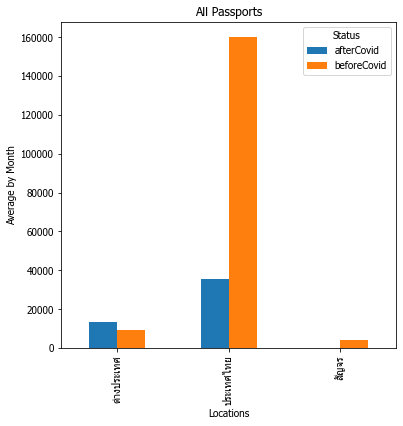

In [168]:
plt.rcParams['font.family'] = 'tahoma'

x = df_ana1.pivot_table('TotalPassport',['Location3'],['Status'],margins=False,aggfunc='sum')
x['afterCovid'] = x['afterCovid']/6 # 6 months
x['beforeCovid'] = x['beforeCovid']/21 # 12+9 months
print(x.round(0))

fig = plt.figure(figsize=(6,6))
ax = plt.subplot("111")


x.plot(kind='bar', 
               ax=ax,
               title='All Passports')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")
plt.show()

In [169]:
# average per month

#GP
a = df_ana1.pivot_table('GeneralPassport',['Location3'],['Status'],margins=False,aggfunc='sum')
a['afterCovid'] = a['afterCovid']/6 # 6 months
a['beforeCovid'] = a['beforeCovid']/21 # 12+9 months
a.round(2)

#HP
b = df_ana1.pivot_table('HajjPassport',['Location3'],['Status'],margins=False,aggfunc='sum')
b['afterCovid'] = b['afterCovid']/6 # 6 months
b['beforeCovid'] = b['beforeCovid']/21 # 12+9 months
b.round(2)

#DP
c = df_ana1.pivot_table('DiplomaticPassport',['Location3'],['Status'],margins=False,aggfunc='sum')
c
c['afterCovid'] = c['afterCovid']/6 # 6 months
c['beforeCovid'] = c['beforeCovid']/21 # 12+9 months
c.round(2)

#OP
d = df_ana1.pivot_table('OfficialPassport',['Location3'],['Status'],margins=False,aggfunc='sum')
d['afterCovid'] = d['afterCovid']/6 # 6 months
d['beforeCovid'] = d['beforeCovid']/21 # 12+9 months
d.round(2)


Status,afterCovid,beforeCovid
Location3,,
ต่างประเทศ,20.00,15.95
ประเทศไทย,335.67,2559.24
สัญจร,0.00,41.33


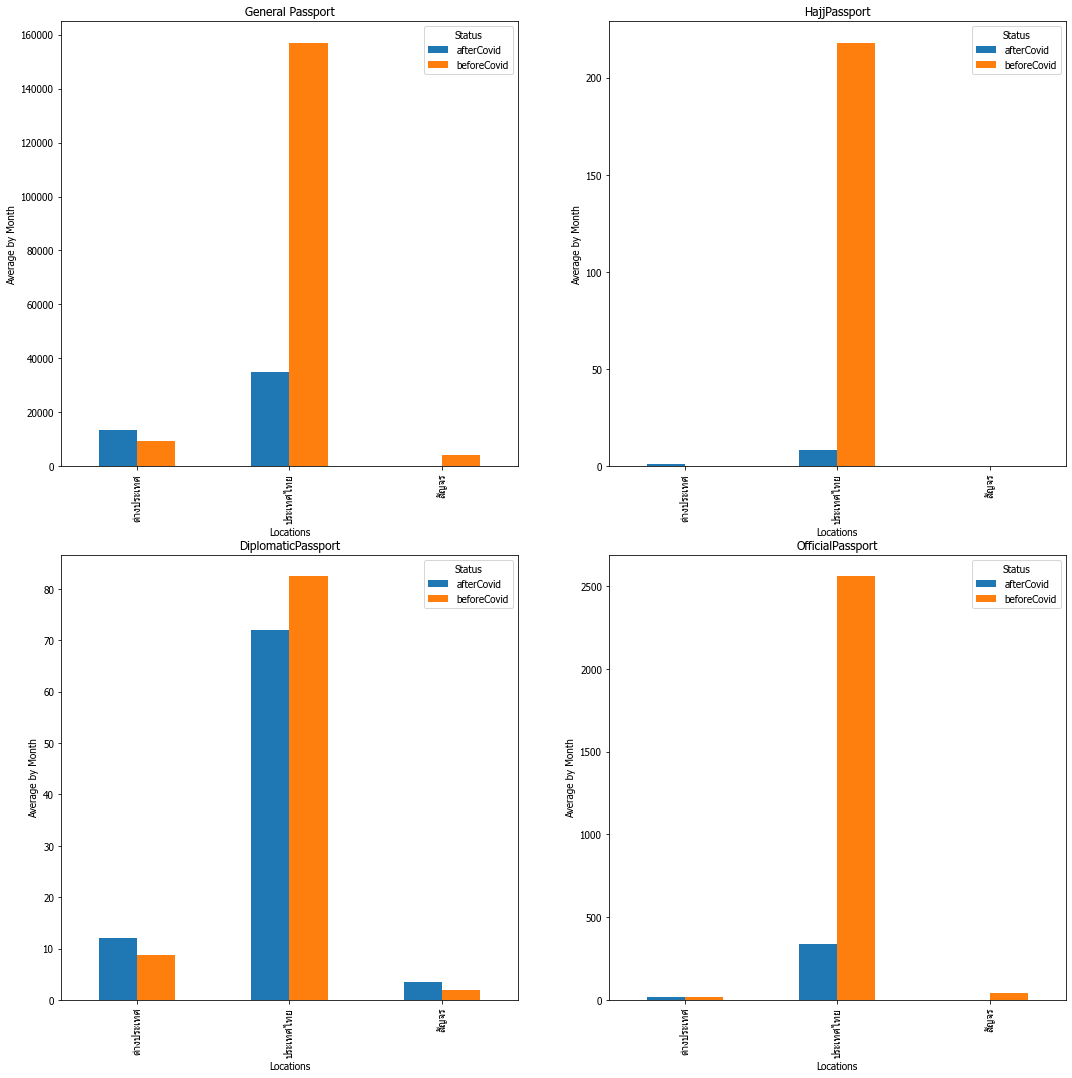

In [170]:
plt.rcParams['font.family'] = 'tahoma'
fig = plt.figure(figsize=(18,18))

ax = plt.subplot("221")
a.plot(kind='bar', 
               ax=ax,
               title='General Passport')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")


ax = plt.subplot("222")
b.plot(kind='bar',
               ax = ax,
               title='HajjPassport')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")


ax = plt.subplot("223")
c.plot(kind='bar',
               ax = ax,
               title='DiplomaticPassport')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")


ax = plt.subplot("224")
d.plot(kind='bar',
               ax = ax,
               title='OfficialPassport')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")
plt.savefig('fig22.png')

plt.show()


# Data Analysis 2

In [171]:
df_all

,Date,ItemNo,Location3,Location2,LoactionCode,LocationName,GeneralPassport,HajjPassport,DiplomaticPassport,OfficialPassport,EmergencyPassport,EmergencyTravelDocuments,TotalPassport,Status
0,2021-05-01,1,ประเทศไทย,ประเทศไทย,BKK-001,กรมการกงสุล,4343,0,10,3,0,0,4356,afterCovid
1,2021-05-01,2,ประเทศไทย,ประเทศไทย,BKK-002,ศูนย์ราชการเฉลิมพระเกียรติ 80 พรรษา,15,0,39,176,0,0,230,afterCovid
2,2021-05-01,3,ประเทศไทย,ประเทศไทย,THA-004,MRT คลองเตย,1055,0,0,0,0,0,1055,afterCovid
3,2021-05-01,4,ประเทศไทย,ประเทศไทย,BKK-005,ศรีนครินทร์,3039,1,1,9,0,0,3050,afterCovid
4,2021-05-01,5,ประเทศไทย,ประเทศไทย,BKK-006,สายใต้ใหม่ – ตลิ่งชัน,1823,1,1,14,0,0,1839,afterCovid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2021-10-01,114,ต่างประเทศ,อเมริกาใต้,EMB-591,ลิมา,1,0,0,0,3,1,4,afterCovid
689,2021-10-01,115,ต่างประเทศ,อเมริกาใต้,EMB-592,บัวโนสไอเรส,1,0,0,0,0,0,1,afterCovid
690,2021-10-01,116,ต่างประเทศ,ออสเตรเลีย,EMB-593,แคนเบอร์รา,45,0,1,0,18,4,64,afterCovid
691,2021-10-01,117,ต่างประเทศ,ออสเตรเลีย,EMB-594,ซิดนีย์,308,0,0,0,0,0,308,afterCovid


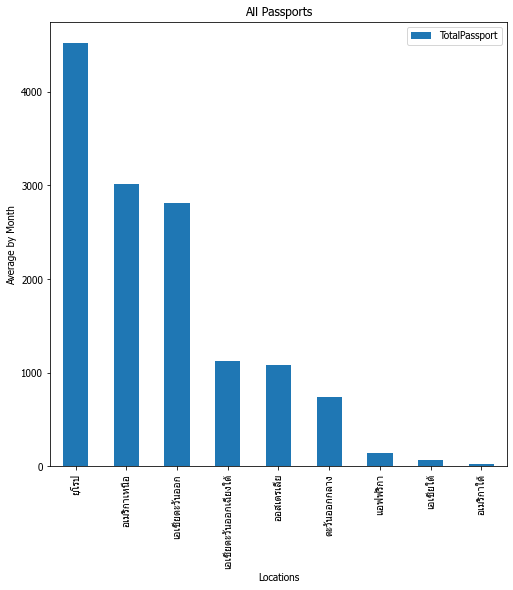

In [172]:
y = df_all.pivot_table(['TotalPassport'],['Location2'],margins=False,aggfunc='sum').sort_values(by='TotalPassport', ascending=False)
y = y/6
y = y.round(2)
y = y[y['TotalPassport'] != 35235.17]
y = y[y['TotalPassport'] != 6.33]

fig = plt.figure(figsize=(18,18))

ax = plt.subplot("221")
y.plot(kind='bar', 
              ax=ax,
              title='All Passports')
ax.set_xlabel("Locations")
ax.set_ylabel("Average by Month")
plt.show()



# Data Analysis 3

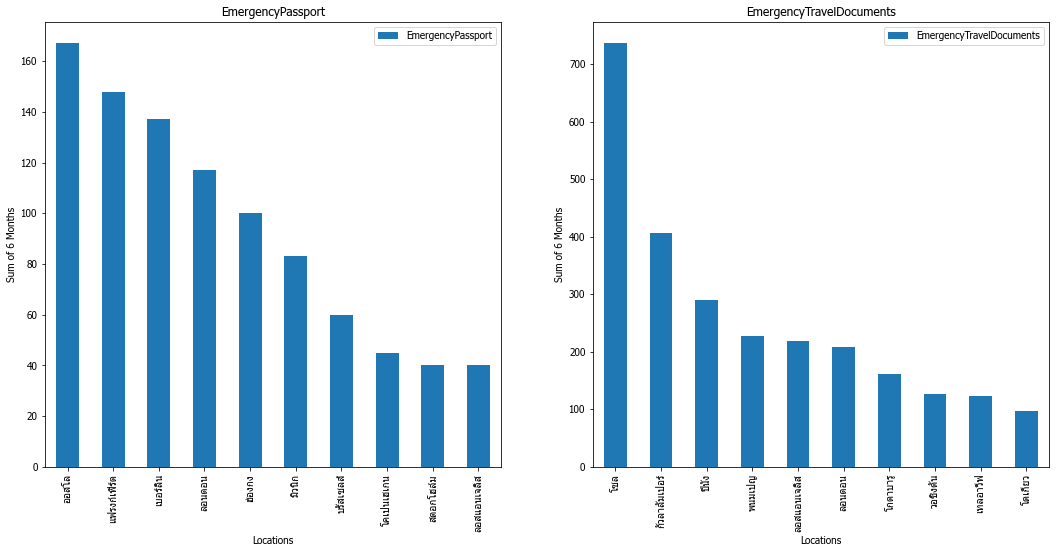

In [173]:
d3 = df_all.pivot_table(['EmergencyTravelDocuments'],['LocationName'],margins=False,aggfunc='sum').sort_values(by=['EmergencyTravelDocuments'],ascending=False)
d3 = d3[0:10]

d4 = df_all.pivot_table(['EmergencyPassport'],['LocationName'],margins=False,aggfunc='sum').sort_values(by=['EmergencyPassport'],ascending=False)
d4 = d4[0:10]

fig = plt.figure(figsize=(18,18))

ax = plt.subplot("222")
d3.plot(kind='bar', 
              ax=ax,
              title='EmergencyTravelDocuments')
ax.set_xlabel("Locations")
ax.set_ylabel("Sum of 6 Months")

ax = plt.subplot("221")
d4.plot(kind='bar', 
              ax=ax,
              title='EmergencyPassport')
ax.set_xlabel("Locations")
ax.set_ylabel("Sum of 6 Months")

plt.show()
